### Data Gerneration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_y(x):
    mean_value, std_value = 0, 0.5 # 0.25 = 0.5 * 0.5(sqare of std_value)
    epsilon = np.random.normal(mean_value, std_value, 1)
    return 3*x*x*x + 2*x*x - 3*x + 1 + epsilon

xi_set = np.random.uniform(-1.5, 1.0, 1000)
yi_set = []
for xi in xi_set:
    yi_set.append(get_y(xi))

### Data Preprocessing

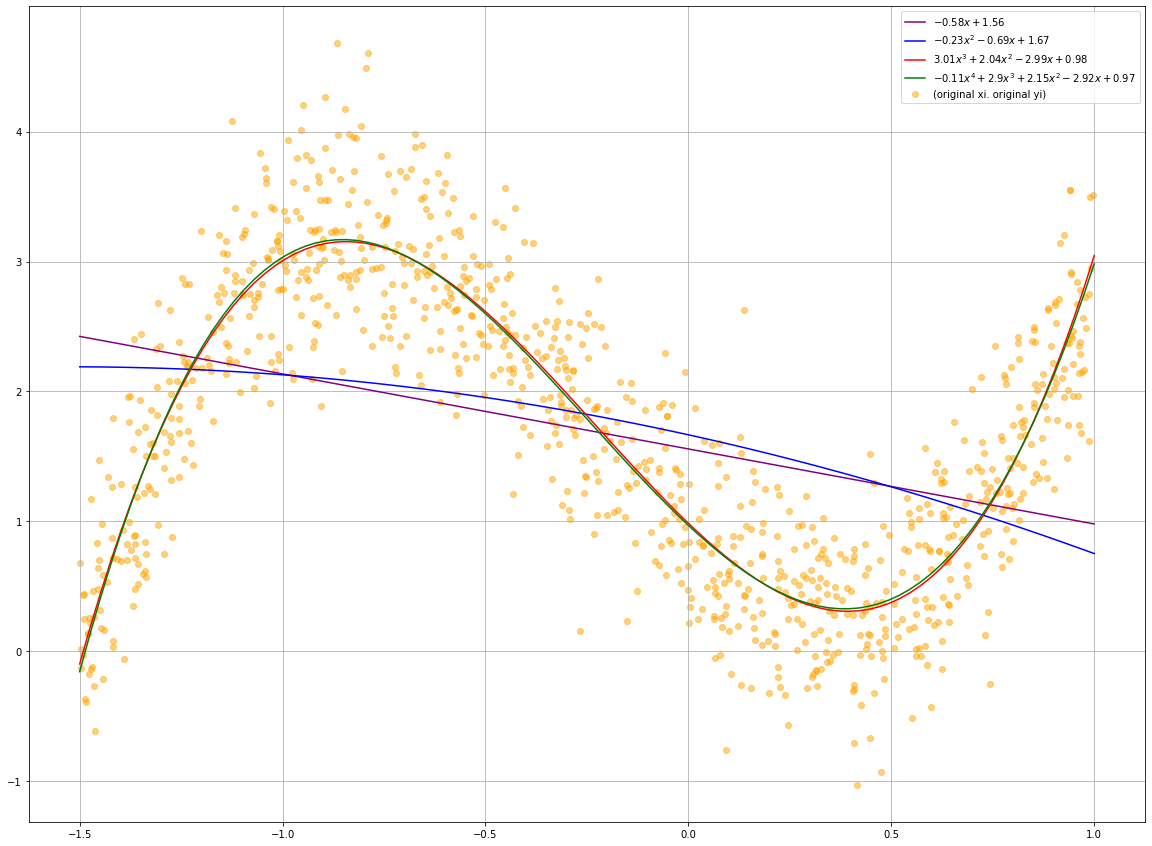

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from polynomial import Polynomial

xi_set_re = xi_set.reshape(len(xi_set), 1)

poly_feat_d1 = PolynomialFeatures(degree = 1)
poly_feat_d2 = PolynomialFeatures(degree = 2)
poly_feat_d3 = PolynomialFeatures(degree = 3)
poly_feat_d4 = PolynomialFeatures(degree = 4)

x_trans_1 = poly_feat_d1.fit_transform(xi_set_re)
x_trans_2 = poly_feat_d2.fit_transform(xi_set_re)
x_trans_3 = poly_feat_d3.fit_transform(xi_set_re)
x_trans_4 = poly_feat_d4.fit_transform(xi_set_re)

model_1 = LinearRegression(fit_intercept=False).fit(x_trans_1, yi_set)
model_2 = LinearRegression(fit_intercept=False).fit(x_trans_2, yi_set)
model_3 = LinearRegression(fit_intercept=False).fit(x_trans_3, yi_set)
model_4 = LinearRegression(fit_intercept=False).fit(x_trans_4, yi_set)

x_min = -1.5
x_max = 1.0

x_test = np.linspace(x_min, x_max, 100)
x_test = x_test.reshape(len(x_test), 1)

x_test_d1 = poly_feat_d1.fit_transform(x_test)
x_test_d2 = poly_feat_d2.fit_transform(x_test)
x_test_d3 = poly_feat_d3.fit_transform(x_test)
x_test_d4 = poly_feat_d4.fit_transform(x_test)

y_predict_1 = model_1.predict(x_test_d1)
y_predict_2 = model_2.predict(x_test_d2)
y_predict_3 = model_3.predict(x_test_d3)
y_predict_4 = model_4.predict(x_test_d4)

w_coef_1 = model_1.coef_[0]
w_coef_2 = model_2.coef_[0]
w_coef_3 = model_3.coef_[0]
w_coef_4 = model_4.coef_[0]

p1 = Polynomial(float(round(w_coef_1[1], 2)), float(round(w_coef_1[0], 2)))
p2 = Polynomial(float(round(w_coef_2[2], 2)), float(round(w_coef_2[1], 2)), float(round(w_coef_2[0], 2)))
p3 = Polynomial(float(round(w_coef_3[3], 2)), float(round(w_coef_3[2], 2)), float(round(w_coef_3[1], 2)), float(round(w_coef_3[0], 2)))
p4 = Polynomial(float(round(w_coef_4[4], 2)), float(round(w_coef_4[3], 2)), float(round(w_coef_4[2], 2)), float(round(w_coef_4[1], 2)), float(round(w_coef_4[0], 2)))

plt.figure(figsize=(20,15))
ax = plt.gca()
plt.scatter(xi_set, yi_set, color="orange", alpha=0.5, label="(original xi. original yi)")
ax.plot(x_test, y_predict_1, color="purple", label="$" + str(p1) + "$")
ax.plot(x_test, y_predict_2, color="blue", label="$" + str(p2) + "$")
ax.plot(x_test, y_predict_3, color="red", label="$" + str(p3) + "$")
ax.plot(x_test, y_predict_4, color="green", label="$" + str(p4) + "$")
plt.legend()
plt.grid(True)
plt.show()